<a href="https://colab.research.google.com/github/MiguelViapiana/aula-dataScience/blob/main/Equa%C3%A7%C3%A3oExponecial_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

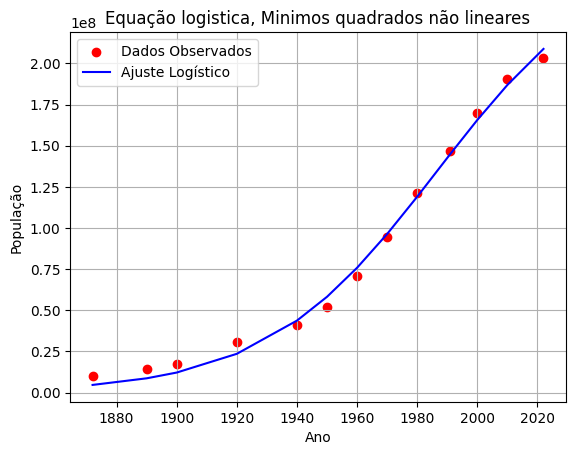

R² = 0.9951773853571547


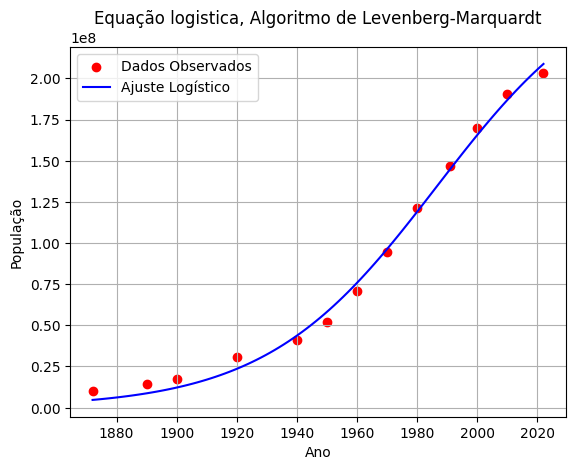

R² = 0.9951773853568099


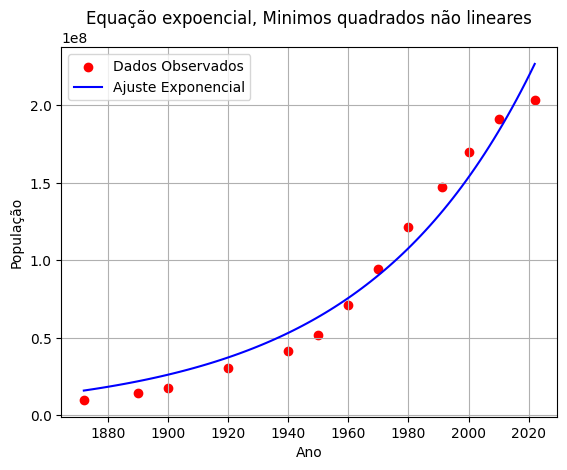

R²: 0.9686962487664277


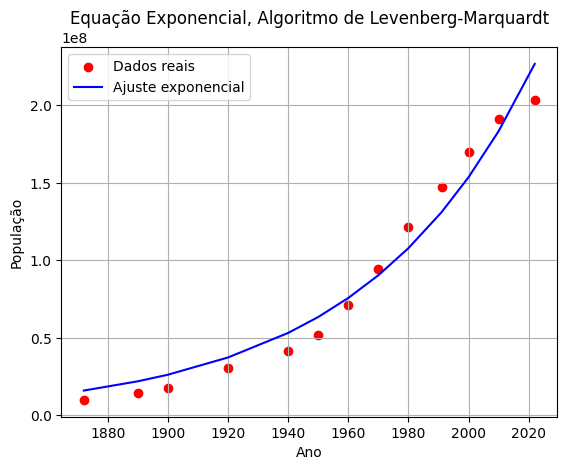

R²: 0.9686962487699526


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados
anos = np.array([1872, 1890, 1900, 1920, 1940,
                 1950, 1960, 1970, 1980, 1991,
                 2000, 2010, 2022])

populacoes = np.array([9930478, 14333915, 17438434, 30635605, 41236315,
                       51944397, 70992343, 94508583, 121150573, 146917459,
                       169872856, 190755799, 203080756])

#Equação logistica, Minimos quadrados não lineares

# Função logística
def logistic(t, K, B, M):
    return K / (1 + np.exp(-B * (t - M)))

# Estimativas iniciais para K, B, M
initial_guess = [max(populacoes), 0.1, 1950]

# Ajuste dos dados
params, covariance = curve_fit(logistic, anos, populacoes, p0=initial_guess)

# Valores ajustados
populacao_ajustada = logistic(anos, *params)

# Cálculo do R^2
residuos = populacoes - populacao_ajustada
ss_res = np.sum(residuos**2)
ss_tot = np.sum((populacoes - np.mean(populacoes))**2)
r_squared = 1 - (ss_res / ss_tot)

# Visualização
plt.scatter(anos, populacoes, label='Dados Observados', color='red')
plt.plot(anos, populacao_ajustada, label='Ajuste Logístico', color='blue')
plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Equação logistica, Minimos quadrados não lineares')
plt.legend()
plt.grid()
plt.show()

print(f"R² = {r_squared}")

#Equação logistica, Algoritmo de Levenberg-Marquardt

# Definindo a função logística
def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Estimativa inicial para os parâmetros
initial_params = [max(populacoes), 0.1, anos[len(anos) // 2]]

# Ajustando a curva
params, covariance = curve_fit(logistic, anos, populacoes, p0=initial_params)

# Criando dados para plotar a curva ajustada
anos_fit = np.linspace(min(anos), max(anos), 100)
populacoes_fit = logistic(anos_fit, *params)

# Cálculo do R²
residuos = populacoes - logistic(anos, *params)
SS_res = np.sum(residuos**2)
SS_tot = np.sum((populacoes - np.mean(populacoes))**2)
r_squared = 1 - (SS_res / SS_tot)

# Plotando os dados e a curva ajustada
plt.scatter(anos, populacoes, label='Dados Observados', color='red')
plt.plot(anos_fit, populacoes_fit, label='Ajuste Logístico', color='blue')
plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Equação logistica, Algoritmo de Levenberg-Marquardt')
plt.legend()
plt.grid()
plt.show()

print(f"R² = {r_squared}")

#Equação expoencial, Minimos quadrados não lineares

# Definindo a função exponencial
def exponencial(t, P0, k):
    return P0 * np.exp(k * t)

# Estimativa inicial para os parâmetros
initial_params = [populacoes[0], 0.01]

# Ajustando a curva
params, covariance = curve_fit(exponencial, anos, populacoes, p0=initial_params)

# Criando dados para plotar a curva ajustada
anos_fit = np.linspace(min(anos), max(anos), 100)
populacoes_fit = exponencial(anos_fit, *params)

# Cálculo do R²
residuos = populacoes - exponencial(anos, *params)
SS_res = np.sum(residuos**2)
SS_tot = np.sum((populacoes - np.mean(populacoes))**2)
r_squared = 1 - (SS_res / SS_tot)

# Plotando os dados e a curva ajustada
plt.scatter(anos, populacoes, label='Dados Observados', color='red')
plt.plot(anos_fit, populacoes_fit, label='Ajuste Exponencial', color='blue')
plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Equação expoencial, Minimos quadrados não lineares')
plt.legend()
plt.grid()
plt.show()

print(f'R²: {r_squared}')


#Equação Exponencial, Algoritmo de Levenberg-Marquardt

# Função exponencial
def funcao_exponencial(x, a, b):
    return a * np.exp(b * (x - 1872))  # Subtraímos 1872 para ajustar o tempo

# Ajuste da curva
parametros_iniciais = [1, 0.01]  # Adivinhação inicial
parametros_otimizados, cov = curve_fit(funcao_exponencial, anos, populacoes, p0=parametros_iniciais)

# Valores ajustados
populacoes_ajustadas = funcao_exponencial(anos, a, b)

# Cálculo do R²
residuos = populacoes - populacoes_ajustadas
ss_res = np.sum(residuos**2)  # Soma dos quadrados dos resíduos
ss_tot = np.sum((populacoes - np.mean(populacoes))**2)  # Soma total dos quadrados
r2 = 1 - (ss_res / ss_tot)

# Plotando os dados e a curva ajustada
plt.scatter(anos, populacoes, label='Dados reais', color='red')
plt.plot(anos, populacoes_ajustadas, label='Ajuste exponencial', color='blue')
plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Equação Exponencial, Algoritmo de Levenberg-Marquardt')
plt.legend()
plt.grid()
plt.show()

print(f'R²: {r2}')
